## Regresion Polinomial & Feature engineering

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso 
import seaborn as sns
import tensorflow as tf

In [132]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [133]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [135]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


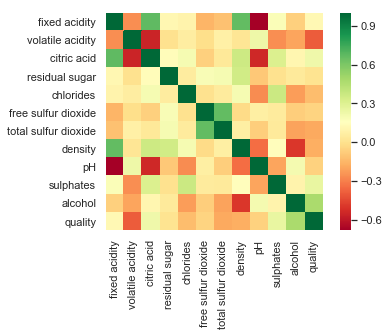

In [136]:
sns.set()
ax = sns.heatmap(data.corr(), square=True, cmap='RdYlGn')

In [137]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397



Las feature que tienen mayor correlación son:
 * Alcohol con correlación positiva
 * Volatile acidity con correlación negativa


In [138]:
data_bk = data
data = data.drop('residual sugar', axis = 1)
data = data.drop('free sulfur dioxide', axis = 1)
data = data.drop('pH', axis = 1)
data = data.drop('density', axis = 1)
data = data.drop('chlorides', axis = 1)
data = data.drop('fixed acidity', axis = 1)
data = data.drop('total sulfur dioxide', axis = 1)
data = data.drop('citric acid', axis = 1)
#data = data.drop('sulphates', axis = 1)
data.head()

,volatile acidity,sulphates,alcohol,quality
0,0.70,0.56,9.4,5
1,0.88,0.68,9.8,5
2,0.76,0.65,9.8,5
3,0.28,0.58,9.8,6
4,0.70,0.56,9.4,5


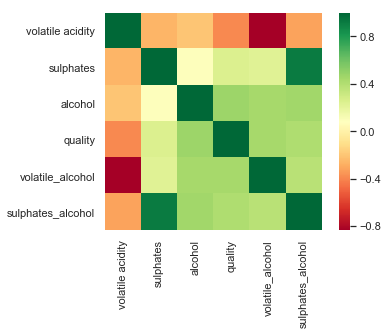

In [201]:
# creando una nueva feature entre alcohol y volatile acidity
data['volatile_alcohol'] = data['alcohol'] / (data['volatile acidity'])
data['sulphates_alcohol'] = data['sulphates'] * (data['alcohol'])
ax = sns.heatmap(data.corr(), square=True, cmap='RdYlGn')

In [202]:
data.corr()

,volatile acidity,sulphates,alcohol,quality,volatile_alcohol,sulphates_alcohol
volatile acidity,1.000000,-0.260987,-0.202288,-0.390558,-0.835441,-0.313934
sulphates,-0.260987,1.000000,0.093595,0.251397,0.230061,0.924210
alcohol,-0.202288,0.093595,1.000000,0.476166,0.447370,0.457410
quality,-0.390558,0.251397,0.476166,1.000000,0.440859,0.412858
volatile_alcohol,-0.835441,0.230061,0.447370,0.440859,1.000000,0.376439
sulphates_alcohol,-0.313934,0.924210,0.457410,0.412858,0.376439,1.000000


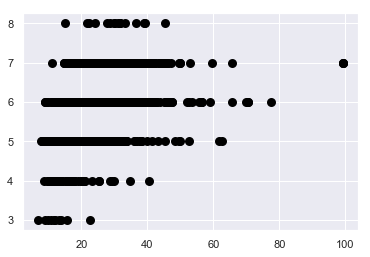

In [203]:
plt.scatter(data['volatile_alcohol'], data['quality'], color='black', linewidth=3)
plt.show()

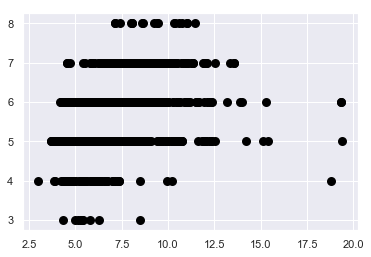

In [204]:
plt.scatter(data['sulphates_alcohol'], data['quality'], color='black', linewidth=3)
plt.show()

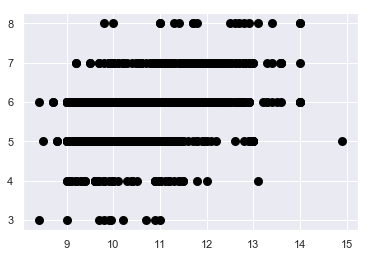

In [205]:
plt.scatter(data['alcohol'], data['quality'], color='black', linewidth=3)
plt.show()

In [214]:
x = data['alcohol'].astype('float32')
a1 = tf.Variable(tf.random_normal([]), name = 'a1', dtype = tf.float32)
a2 = tf.Variable(tf.random_normal([]), name = 'a2', dtype = tf.float32)
b = tf.Variable(tf.random_normal([]), name = 'bias', dtype = tf.float32)
y = data['quality'].astype('float32')

y_pred = a1*tf.pow(x, 2) + a2*tf.pow(x, 1) + b
loss = tf.reduce_mean(tf.pow(y_pred - y, 2))

learn_rate = 0.01
epochs = 100
optimizer = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in rang(epochs):
        sess.run(optimizar)
    
    print('a ', sess.run(a))
    print('b ', sess.run(b))

TypeError: Tensor objects are only iterable when eager execution is enabled. To iterate over this tensor use tf.map_fn.